<a href="https://colab.research.google.com/github/gabrielbaltazarmw2/Conceitos-TV-P2/blob/main/02_OFDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questão 1
Multiplexação e Demultiplexação de um sinal OFDM com duas portadora

In [1]:
# importação das bibliotecas
import numpy as np
import matplotlib.pyplot as plt

## Transmissor
Gera a sequência de dados, converte para símbolos QAM, divide a sequência de símbolos para cada portadora, multiplexa as portadoras

Criação da estrutura OFDM com duas portadoras:

In [69]:
# Bits por símbolo
bps = 4

# 16QAM
M = 2 ** bps

# Número de pontos FFT
nFFT = 64

# Número de subportadoras
n = nFFT

# geração da sequêcia de símbolos de 1-16 e tamanho 128 para as duas portadoras (informação que se quer transmitir)
txsymbols = np.random.randint(0, M, size=(2*n,))

# geração da constelação 16QAM
constellation = np.array([-3 - 3j, -3 - 1j, -3 + 3j, -3 + 1j,
                         -1 - 3j, -1 - 1j, -1 + 3j, -1 + 1j,
                          3 - 3j,  3 - 1j,  3 + 3j,  3 + 1j,
                          1 - 3j,  1 - 1j,  1 + 3j,  1 + 1j])

# Mapeamento dos símbolos para a constelação QAM
tx_symbols_qam = constellation[txsymbols]

In [70]:
# divisão dos símbolos para as portadoras (cada portadora enviara dados diferentes)
tx_symbols_qam_1 = tx_symbols_qam[:n]  # a primeira portadora vai ficar com os 64 primeiros símbolos
tx_symbols_qam_2 = tx_symbols_qam[n:]  # a segunda portadora vai ficar com os 64 ultimos símbolos


In [ ]:
tx_symbols_qam == np.concatenate((tx_symbols_qam_1, tx_symbols_qam_2))

Modulação OFDM para as duas portadoras:

Text(0, 0.5, 'Parte Real')

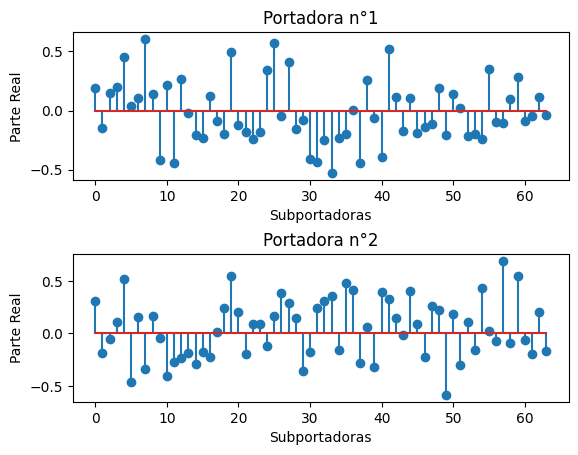

In [71]:
# IFFT é aplicada para transformar o sinal em senoides sobrepostas ortogonais (subportadoras) no domínio do tempo (OFDM)
tx_time_signal_1 = np.fft.ifft(tx_symbols_qam_1, nFFT)
tx_time_signal_2 = np.fft.ifft(tx_symbols_qam_2, nFFT)

#plot das portadoras separadas
plt.subplots_adjust(hspace=0.5)
plt.subplot(211)
plt.stem(np.real(tx_time_signal_1))
plt.title("Portadora n°1")
plt.xlabel("Subportadoras")
plt.ylabel("Parte Real")
plt.subplot(212)
plt.stem(np.real(tx_time_signal_2))
plt.title("Portadora n°2")
plt.xlabel("Subportadoras")
plt.ylabel("Parte Real")

Multiplexação das duas portadoras sem intervalor de guarda:

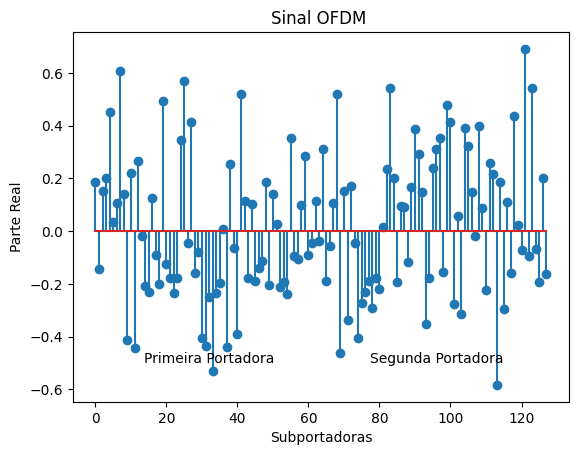

In [98]:
# Multiplexação das portadoras
tx_time_signal = np.concatenate((tx_time_signal_1, tx_time_signal_2))  # Sinal que é transmitido

# plot do sinal OFDM com as duas portadoras
plt.stem(np.real(tx_time_signal))
plt.title("Sinal OFDM ")
plt.xlabel("Subportadoras")
plt.ylabel("Parte Real")

# Definir os intervalos das strings
intervalo1 = (0, 32)
intervalo2 = (64, 64+32)

# Definir as strings correspondentes aos intervalos
string1 = 'Primeira Portadora'
string2 = 'Segunda Portadora'

# Adicionar as strings abaixo dos ticks do eixo x
plt.text(intervalo1[1], -0.5, string1, ha='center')
plt.text(intervalo2[1], -0.5 , string2, ha='center')

# Exibir o plot
plt.show()

## Canal
Adição apenas de ruído

In [73]:
# Simulação do canal (adição de ruído AWGN)
SNR_dB = 40
SNR_linear = 10 ** (SNR_dB / 10)
noise_std = np.sqrt(1 / SNR_linear)
rx_time_signal_noise = tx_time_signal + noise_std * np.random.randn(len(tx_time_signal),)  # Adicionando ruído AWGN

##Receptor

Recebe o sinal OFDM, demultiplexa as portadoras, converte para a sequência de constelação QAM, converte de QAM para a sequência de dados

In [76]:
# Demultiplexação das portadoras
rx_time_signal_1 = rx_time_signal_noise[:n]
rx_time_signal_2 = rx_time_signal_noise[n:]
rx_time_signal = np.concatenate([rx_time_signal_1, rx_time_signal_2])

# Verificar se os arrays são iguais
if np.array_equal(rx_time_signal_noise, rx_time_signal):
    print("Demultiplexação correta")
else:
    print("Os arrays são diferentes.")


# FFT - Transformada de Fourier (de volta para o dominio QAM)
rx_symbols_qam_1 = np.fft.fft(rx_time_signal_1, nFFT)  # símbolos recebidos da primeira portadora
rx_symbols_qam_2 = np.fft.fft(rx_time_signal_2, nFFT)  # símbolos recebidos da segunda portadora
rx_symbols_qam = np.concatenate([rx_symbols_qam_1, rx_symbols_qam_2])

# Demapeamento dos símbolos recebidos (decisor)
rx_symbols_1 = np.argmin(np.abs(rx_symbols_qam_1[:, None] - constellation), axis=1)  # dados da primeira portadora
rx_symbols_2 = np.argmin(np.abs(rx_symbols_qam_2[:, None] - constellation), axis=1)  # dados da segunda portadora

rx_symbols = np.concatenate([rx_symbols_1, rx_symbols_2])

if np.array_equal(txsymbols, rx_symbols):
    print("Símbolos recuperados correspondem aos símbolos transmitidos.")
else:
    print("Símbolos recuperados não correspondem aos símbolos transmitidos.")

Demultiplexação correta
Símbolos recuperados correspondem aos símbolos transmitidos.


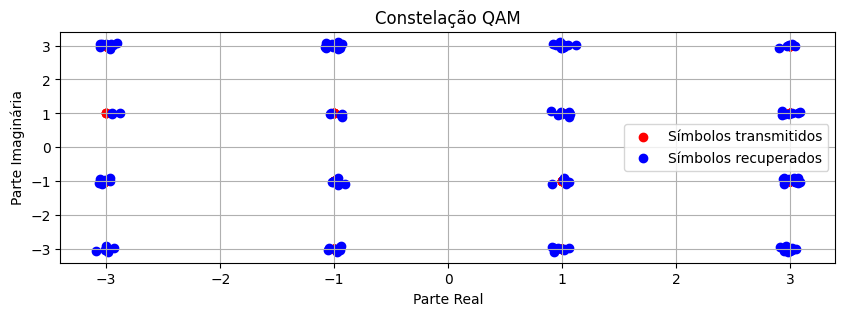

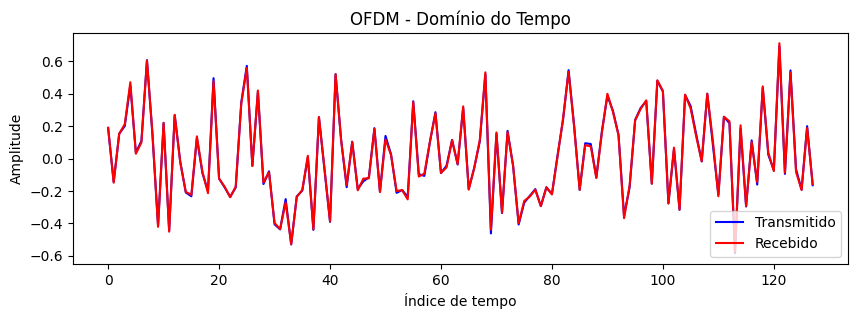

In [79]:
# Plotagem da constelação dos símbolos transmitidos
plt.figure(figsize=(10, 3))
plt.scatter(np.real(tx_symbols_qam), np.imag(tx_symbols_qam), color='red', label='Símbolos transmitidos')
plt.scatter(np.real(rx_symbols_qam), np.imag(rx_symbols_qam), color='blue', label='Símbolos recuperados')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Constelação QAM')
plt.legend()
plt.grid(True)
plt.show()

# Plotagem no domínio do tempo
plt.figure(figsize=(10, 3))
plt.plot(np.real(tx_time_signal), 'b-', label='Transmitido')
plt.plot(np.real(rx_time_signal), 'r-', label='Recebido')
plt.xlabel('Índice de tempo')
plt.ylabel('Amplitude')
plt.title('OFDM - Domínio do Tempo')
plt.legend()

Text(0, 0.5, 'Parte Real')

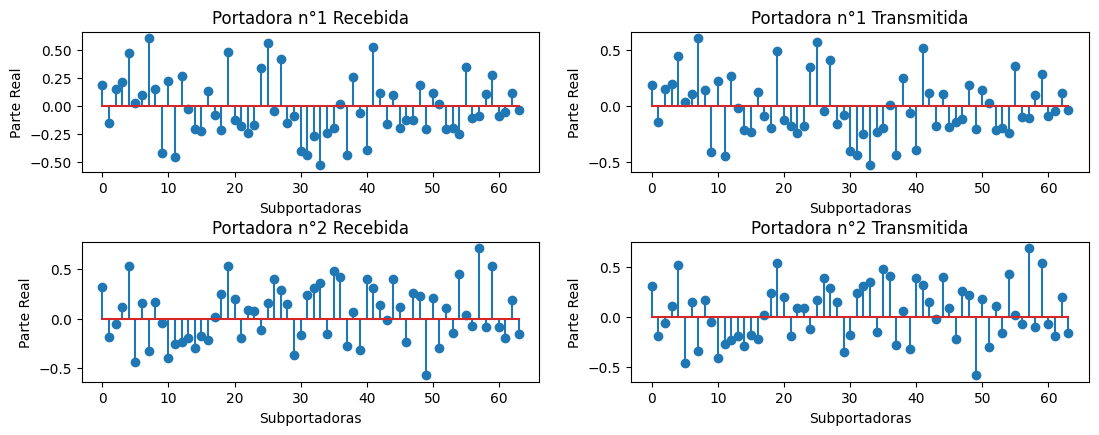

In [88]:
#plot das portadoras separadas
plt.figure(figsize=(13, 10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(4,2,1)
plt.stem(np.real(rx_time_signal_1))
plt.title("Portadora n°1 Recebida")
plt.xlabel("Subportadoras")
plt.ylabel("Parte Real")

plt.subplot(423)
plt.stem(np.real(rx_time_signal_2))
plt.title("Portadora n°2 Recebida")
plt.xlabel("Subportadoras")
plt.ylabel("Parte Real")


plt.subplot(422)
plt.stem(np.real(tx_time_signal_1))
plt.title("Portadora n°1 Transmitida")
plt.xlabel("Subportadoras")
plt.ylabel("Parte Real")

plt.subplot(424)
plt.stem(np.real(tx_time_signal_2))
plt.title("Portadora n°2 Transmitida")
plt.xlabel("Subportadoras")
plt.ylabel("Parte Real")

#Questão 2
Aplicar o intervalo de guarda no sinal OFDM e o efeito de multiplos percursos

## Transmissor
Gera a sequência de dados, converte para símbolos QAM, divide a sequência de símbolos para cada portadora, multiplexa as portadoras com um intervalo de guarda

In [2]:
# importação das bibliotecas
import numpy as np
import matplotlib.pyplot as plt

Criação da estrutura OFDM com duas portadoras:

In [3]:
# Bits por símbolo
bps = 4

# 16QAM
M = 2 ** bps

# Número de pontos FFT
nFFT = 64

# Número de subportadoras
n = nFFT

# geração da sequêcia de símbolos de 1-16 e tamanho 128 para as duas portadoras (informação que se quer transmitir)
txsymbols = np.random.randint(0, M, size=(2*n,))

# geração da constelação 16QAM
constellation = np.array([-3 - 3j, -3 - 1j, -3 + 3j, -3 + 1j,
                         -1 - 3j, -1 - 1j, -1 + 3j, -1 + 1j,
                          3 - 3j,  3 - 1j,  3 + 3j,  3 + 1j,
                          1 - 3j,  1 - 1j,  1 + 3j,  1 + 1j])

# Mapeamento dos símbolos para a constelação QAM
tx_symbols_qam = constellation[txsymbols]

In [4]:
# divisão dos símbolos para as portadoras (cada portadora enviara dados diferentes)
tx_symbols_qam_1 = tx_symbols_qam[:n]  # a primeira portadora vai ficar com os 64 primeiros símbolos
tx_symbols_qam_2 = tx_symbols_qam[n:]  # a segunda portadora vai ficar com os 64 ultimos símbolos

Modulação OFDM para as duas portadoras:

Text(0, 0.5, 'Parte Real')

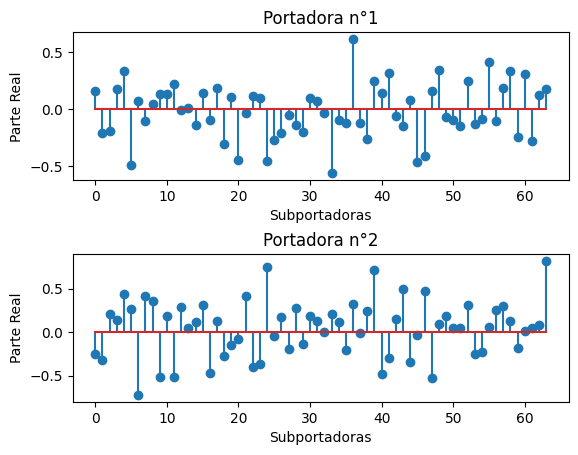

In [5]:
# IFFT é aplicada para transformar o sinal em senoides sobrepostas ortogonais (subportadoras) no domínio do tempo (OFDM)
tx_time_signal_1 = np.fft.ifft(tx_symbols_qam_1, nFFT)
tx_time_signal_2 = np.fft.ifft(tx_symbols_qam_2, nFFT)

#plot das portadoras separadas
plt.subplots_adjust(hspace=0.5)
plt.subplot(211)
plt.stem(np.real(tx_time_signal_1))
plt.title("Portadora n°1")
plt.xlabel("Subportadoras")
plt.ylabel("Parte Real")
plt.subplot(212)
plt.stem(np.real(tx_time_signal_2))
plt.title("Portadora n°2")
plt.xlabel("Subportadoras")
plt.ylabel("Parte Real")

Multiplexação das duas portadoras com intervalor de guarda:

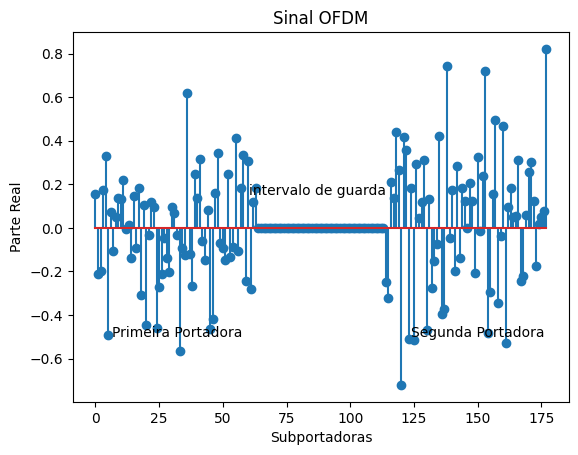

In [6]:
# intervalo de guarda
N = 50
intervalo_guarda = np.zeros(N)

# Pontos FFT
nFFT = nFFT + N

# Multiplexação das portadoras com intervalo de guarda
tx_time_signal = np.concatenate((tx_time_signal_1,intervalo_guarda, tx_time_signal_2))  # Sinal que é transmitido

# plot do sinal OFDM com as duas portadoras
plt.stem(np.real(tx_time_signal))
plt.title("Sinal OFDM")
plt.xlabel("Subportadoras")
plt.ylabel("Parte Real")

# Definir os intervalos das strings
intervalo1 = (0, 32)
intervalo2 = (64, 64+32)

# Definir as strings correspondentes aos intervalos
string1 = 'Primeira Portadora'
string2 = 'Segunda Portadora'

# Adicionar as strings abaixo dos ticks do eixo x
plt.text(intervalo1[1], -0.5, string1, ha='center')
plt.text(150, -0.5 , string2, ha='center')
plt.text(87, 0.15 , "intervalo de guarda", ha='center')

# Exibir o plot
plt.show()

Como vamos simular o efeito do canal no sinal, ou seja, aplicar a convolução do sinal com a resposta ao impulso do canal, precisamos aplicar o prefixo cíclico ao sinal para a correta computação da convolução pelo algoritmo

In [7]:
nCP = 8  # Comprimento do prefixo cíclico

# Adicionar o prefixo cíclico
tx_cp = tx_time_signal[-nCP:]
tx_time_signal_ciclic = np.concatenate((tx_cp, tx_time_signal))

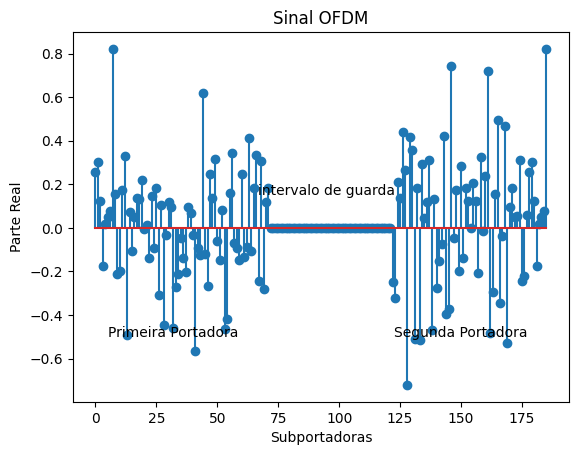

In [8]:
# plot do sinal OFDM com as duas portadoras
plt.stem(np.real(tx_time_signal_ciclic))
plt.title("Sinal OFDM")
plt.xlabel("Subportadoras")
plt.ylabel("Parte Real")

# Definir os intervalos das strings
intervalo1 = (0, 32)
intervalo2 = (64, 64+32)

# Definir as strings correspondentes aos intervalos
string1 = 'Primeira Portadora'
string2 = 'Segunda Portadora'

# Adicionar as strings abaixo dos ticks do eixo x
plt.text(intervalo1[1], -0.5, string1, ha='center')
plt.text(150, -0.5 , string2, ha='center')
plt.text(95, 0.15 , "intervalo de guarda", ha='center')

# Exibir o plot
plt.show()

## Canal
Adição de ruído, efeito de frequência e multipercurso

In [9]:
# Simulação do canal (adição de ruído AWGN)
SNR_dB = 40
SNR_linear = 10 ** (SNR_dB / 10)
noise_std = np.sqrt(1 / SNR_linear)
rx_time_signal_noise = tx_time_signal_ciclic + noise_std * np.random.randn(len(tx_time_signal_ciclic),)  # Adicionando ruído AWGN

In [10]:
# Modelar múltiplos percursos no canal
hchan = np.array([0.4, 1, 0.4])  # Coeficientes do canal principal
hchan_multipath = np.array([0.3, 0.2, 0.1])  # Coeficientes dos caminhos de propagação adicionais
channel_response = np.convolve(hchan, hchan_multipath)  # Resposta impulsiva combinada do canal

In [11]:
from scipy.signal import convolve
# Filtrar a transmissão através do canal com múltiplos percursos
rx_filtered = convolve(rx_time_signal_noise, channel_response, mode='full')[:len(rx_time_signal_noise)]

In [12]:
# Adicionar atraso
delay = 5
rx_delay = np.roll(rx_filtered, delay)  # Aplicar o atraso

##Receptor
Sinal recebido com atraso, efeitos do canal e multipercursos

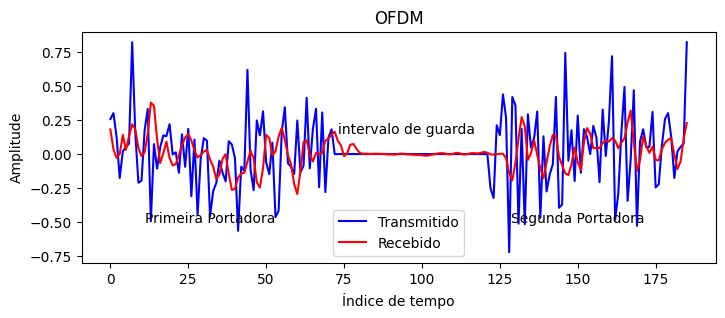

In [13]:
# Plotagem no domínio do tempo
plt.figure(figsize=(18, 3))
plt.subplot(1,2,1)
plt.plot(np.real(tx_time_signal_ciclic), 'b-', label='Transmitido')
plt.plot(np.real(rx_delay), 'r-', label='Recebido')
plt.xlabel('Índice de tempo')
plt.ylabel('Amplitude')
plt.title('OFDM')
# Definir as strings correspondentes aos intervalos
string1 = 'Primeira Portadora'
string2 = 'Segunda Portadora'

# Adicionar as strings abaixo dos ticks do eixo x
plt.text(32, -0.5, string1, ha='center')
plt.text(150, -0.5 , string2, ha='center')
plt.text(95, 0.15 , "intervalo de guarda", ha='center')
plt.legend()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


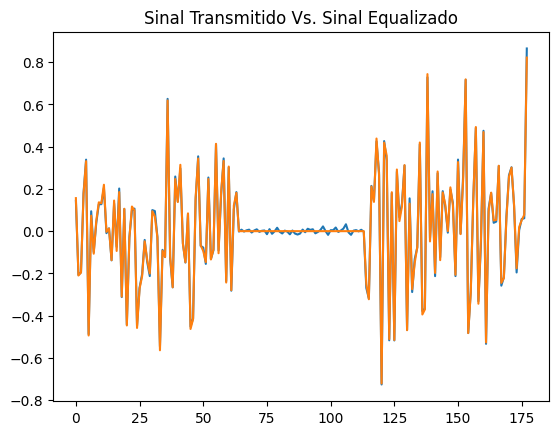

In [67]:
# Remover o prefixo cíclico e sincronizar o sinal recebido
rxin_no_delay = np.roll(rx_delay, -delay)
rx_sync = rxin_no_delay[nCP:]

nFFT = len(rx_sync)

# Equalização
hfchan = np.fft.fft(channel_response, nFFT)
rx_eq = np.fft.fft(rx_sync, nFFT) / (hfchan)

rx_time = np.fft.ifft(rx_eq, nFFT)

plt.plot(rx_time);
plt.plot(tx_time_signal);
plt.title("Sinal Transmitido Vs. Sinal Equalizado");

In [68]:
# Remoção do intervalo de guarda
rx_time_no_guard = np.delete(rx_time, range(64, 64+50))

# Demultiplexação das portadoras
rx_time_1 = rx_time_no_guard[:n]
rx_time_2 = rx_time_no_guard[n:]

rx_time_signal = np.concatenate([rx_time_1, rx_time_2])

# Verificar se os arrays são iguais
if np.array_equal(rx_time_signal, rx_time_no_guard):
    print("Demultiplexação correta")
else:
    print("Os arrays são diferentes.")

# Ajuste do número de pontos da FFT
nFFT = len(rx_time_1)

# FFT - Transformada de Fourier (de volta para o dominio QAM)
rx_symbols_qam_1 = np.fft.fft(rx_time_1, nFFT)  # símbolos recebidos da primeira portadora
rx_symbols_qam_2 = np.fft.fft(rx_time_2, nFFT)  # símbolos recebidos da segunda portadora
rx_symbols_qam = np.concatenate([rx_symbols_qam_1, rx_symbols_qam_2])

# Demapeamento dos símbolos recebidos (decisor)
rx_symbols_1 = np.argmin(np.abs(rx_symbols_qam_1[:, None] - constellation), axis=1)  # dados da primeira portadora
rx_symbols_2 = np.argmin(np.abs(rx_symbols_qam_2[:, None] - constellation), axis=1)  # dados da segunda portadora

rx_symbols = np.concatenate([rx_symbols_1, rx_symbols_2])

if np.array_equal(txsymbols, rx_symbols):
    print("Símbolos recuperados correspondem aos símbolos transmitidos.")
else:
    print("Símbolos recuperados não correspondem aos símbolos transmitidos.")


Demultiplexação correta
Símbolos recuperados correspondem aos símbolos transmitidos.


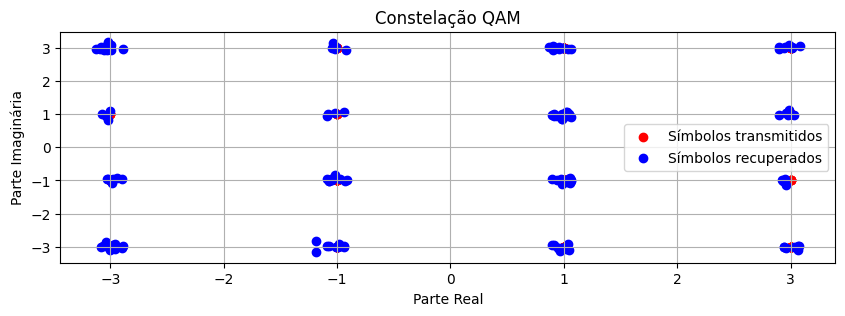

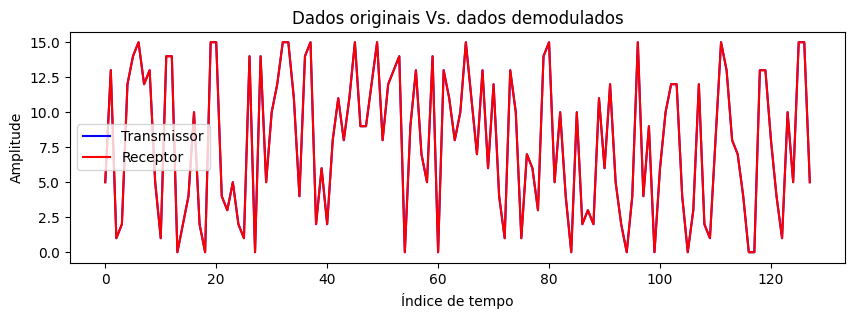

In [71]:
# Plotagem da constelação dos símbolos transmitidos
plt.figure(figsize=(10, 3))
plt.scatter(np.real(tx_symbols_qam), np.imag(tx_symbols_qam), color='red', label='Símbolos transmitidos')
plt.scatter(np.real(rx_symbols_qam), np.imag(rx_symbols_qam), color='blue', label='Símbolos recuperados')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Constelação QAM')
plt.legend()
plt.grid(True)
plt.show()

# Plotagem no domínio do tempo
plt.figure(figsize=(10, 3))
plt.plot(np.real(txsymbols), 'b-', label='Transmissor')
plt.plot(np.real(rx_symbols), 'r-', label='Receptor')
plt.xlabel('Índice de tempo')
plt.ylabel('Amplitude')
plt.title('Dados originais Vs. dados demodulados')
plt.legend()

#Questão 3
Inserção de uma portadora piloto, equalização e estimação do sinal

## Transmissor
Gera a sequência de dados, converte para símbolos QAM, divide a sequência de símbolos para cada portadora, multiplexa as portadoras

Criação da estrutura OFDM com duas portadoras e uma portadora piloto:

In [78]:
# Bits por símbolo
bps = 4

# 16QAM
M = 2 ** bps

# Número de pontos FFT
nFFT = 64

# Número de subportadoras
n = nFFT

# geração da sequêcia de símbolos de 1-16 e tamanho 128 para as duas portadoras (informação que se quer transmitir)
txsymbols = np.random.randint(0, M, size=(2*n,))

# geração da constelação 16QAM
constellation = np.array([-3 - 3j, -3 - 1j, -3 + 3j, -3 + 1j,
                         -1 - 3j, -1 - 1j, -1 + 3j, -1 + 1j,
                          3 - 3j,  3 - 1j,  3 + 3j,  3 + 1j,
                          1 - 3j,  1 - 1j,  1 + 3j,  1 + 1j])

# Mapeamento dos símbolos para a constelação QAM
tx_symbols_qam = constellation[txsymbols]

In [84]:
# divisão dos símbolos para as portadoras (cada portadora enviara dados diferentes)
tx_symbols_qam_1 = tx_symbols_qam[:n]  # a primeira portadora vai ficar com os 64 primeiros símbolos
tx_symbols_qam_2 = tx_symbols_qam[n:]  # a segunda portadora vai ficar com os 64 ultimos símbolos

# geração da portadora piloto
pilot_symbols = np.ones(nFFT)


In [85]:
len(pilot_symbols)

64

Modulação OFDM para as portadoras:

Text(0, 0.5, 'Parte Real')

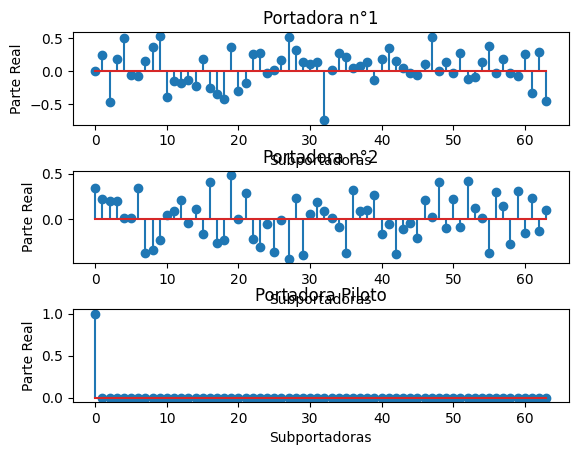

In [86]:
# IFFT é aplicada para transformar o sinal em senoides sobrepostas ortogonais (subportadoras) no domínio do tempo (OFDM)
tx_time_signal_1 = np.fft.ifft(tx_symbols_qam_1, nFFT)
tx_time_signal_2 = np.fft.ifft(tx_symbols_qam_2, nFFT)
pilot_time = np.fft.ifft(pilot_symbols, nFFT)

#plot das portadoras separadas
plt.subplots_adjust(hspace=0.5)
plt.subplot(311)
plt.stem(np.real(tx_time_signal_1))
plt.title("Portadora n°1")
plt.xlabel("Subportadoras")
plt.ylabel("Parte Real")
plt.subplot(312)
plt.stem(np.real(tx_time_signal_2))
plt.title("Portadora n°2")
plt.xlabel("Subportadoras")
plt.ylabel("Parte Real")
plt.subplot(313)
plt.stem(np.real(pilot_time))
plt.title("Portadora Piloto")
plt.xlabel("Subportadoras")
plt.ylabel("Parte Real")

In [83]:
len(pilot_time)

64